<a href="https://colab.research.google.com/github/mariodac/Santander-Coders-2024-Data-Science/blob/main/intro_machine_learning_2pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

Obtendo dataset breast cancer

In [2]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')


! kaggle datasets download -d yasserh/breast-cancer-dataset
! unzip "breast-cancer-dataset.zip"

Dataset URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset
License(s): CC0-1.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 59.1MB/s]
Archive:  breast-cancer-dataset.zip
  inflating: breast-cancer.csv       


In [4]:
df = pd.read_csv('breast-cancer.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
x = df.drop(columns=['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [15]:
modelo = LogisticRegression(max_iter=10000)

In [16]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [17]:
modelo.fit(x_treino, y_treino)

LogisticRegression(max_iter=10000)

In [18]:
y_previsto = modelo.predict(x_teste)

In [19]:
cm = confusion_matrix(y_previsto, y_teste)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

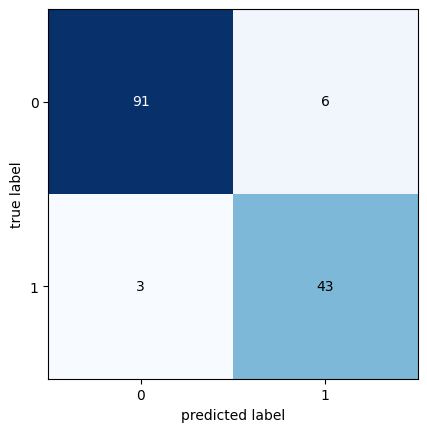

In [20]:
plot_confusion_matrix(cm)

In [21]:
print(classification_report(y_previsto, y_teste))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95        97
           M       0.88      0.93      0.91        46

    accuracy                           0.94       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

